In [ ]:
%matplotlib inline
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

size = 5
kernel_template = np.hstack((np.ones((1,int((size-1)/2)+1)),np.zeros((1,int((size-1)/2)))))
print("=====")
print(kernel_template)
pad = np.zeros((1,size))
print("=====")
print(pad)
kernel = np.tile(kernel_template, (int((size-1)/2)+1,1))
print("=====")
print(kernel)
kernel = np.vstack((kernel, np.tile(pad, (int((size-1)/2),1))))
print("=====")
print(kernel)
average = kernel/np.sum(kernel)
print(average)


kernelstack = np.empty((4,size,size)) 
kernelstack[0] = average			              # a
kernelstack[1] = np.fliplr(kernel)	        # b
kernelstack[2] = np.flipud(kernel)	        # c
kernelstack[3] = np.fliplr(kernelstack[2])	# d
print("====")
print(kernelstack)
# [ a  a  ab   b  b]
# [ a  a  ab   b  b]
# [ac ac abcd bd bd]
# [ c  c  cd   d  d]
# [ c  c  cd   d  d]

=====
[[1. 1. 1. 0. 0.]]
=====
[[0. 0. 0. 0. 0.]]
=====
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]]
=====
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
====
[[[0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.         0.         1.         1.         1.        ]
  [0.         0.         1.         1.         1.        ]
  [0.         0.         1.         1.         1.        ]
  [0.         0.      

In [ ]:
def conv2d(image, kernel):
    m, n = kernel.shape
    # pad = np.zeros((image.shape[0] + m-1, image.shape[1] + n-1, 3))
    # pad[(m-1)/2:-(n-1)/2, (m-1)/2:-(n-1)/2] = image
    # image = image[int((m-1)/2):-int((n-1)/2), int((m-1)/2):-int((n-1)/2)]
    # print(kernel.shape)
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y ,x))
        # print (new_image.shape)
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
        pad = np.zeros((new_image.shape[0] + m-1, new_image.shape[1] + n-1))
        pad[int((m-1)/2):-int((n-1)/2), int((m-1)/2):-int((n-1)/2)] = new_image
        new_image = pad
    return new_image

def Kuwahara(image, size, v_= None):

    image = image.astype(np.float64)
    output = np.zeros(image.shape)
    mean = np.zeros([4, image.shape[0],image.shape[1]])
    std = mean.copy()

    kernel_template = np.hstack((np.ones((1,int((size-1)/2)+1)),np.zeros((1,int((size-1)/2)))))
    # =====
    # [[1. 1. 1. 0. 0.]]
    pad = np.zeros((1,size))
    # =====
    # [[0. 0. 0. 0. 0.]]
    kernel = np.tile(kernel_template, (int((size-1)/2)+1,1))
    # =====
    # [[1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]]
    kernel = np.vstack((kernel, np.tile(pad, (int((size-1)/2),1))))
    # =====
    # [[1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [0. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0.]]
    # =====
    average = kernel/np.sum(kernel)
    # =====
    # [[0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.         0.         0.         0.         0.        ]
    # [0.         0.         0.         0.         0.        ]]
    # ====
    
    kernelstack = np.empty((4,size,size)) 
    kernelstack[0] = average			              # a
    kernelstack[1] = np.fliplr(average)	        # b
    kernelstack[2] = np.flipud(average)	        # c
    kernelstack[3] = np.fliplr(kernelstack[2])	# d
    
    # [ a  a  ab   b  b]
    # [ a  a  ab   b  b]
    # [ac ac abcd bd bd]
    # [ c  c  cd   d  d]
    # [ c  c  cd   d  d]

    for i in range(4):
        mean[i] = conv2d(image, kernelstack[i]) 	                 # mean 
        std[i] = conv2d(image**2, kernelstack[i]) - mean[i]**2 		 # variance         

    if v_ is not None:
      indices = np.argmin(v_,0) 
      for i in range(image.shape[0]):
          for k in range(image.shape[1]):
              output[i,k] = mean[indices[i,k], i,k].astype('uint8')
    else:
      indices = np.argmin(std,0) 

      for i in range(image.shape[0]):
          for k in range(image.shape[1]):
              output[i,k] = mean[indices[i,k], i,k]

    return output, std

In [ ]:


def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    # print(mx)
    if mx == mn:
        h = 0.0
    elif mx == r:
        h = 60*((g-b)/df % 6)
        
    elif mx == g:
        h = 60*((b-r)/df + 2)
        
    elif mx == b:
        h = 60*((r-g)/df + 4)
        
    if mx == 0.0:
        s = 0.0
    else:
        s = (df/mx)
    v = mx
    return h, s, v

def hsv_to_rgb(h, s, v):
    
    d = h / 60
    hi = int(d % 6)
    f = d - hi
    l = v * (1 - s)
    m = v * (1 - f * s)
    n = v * (1 - (1 - f) * s)
    
    if 0.0 <= h < 60.0:
        return v, n, l
    if 60.0 <= h < 120.0:
        return m, v, l
    if 120.0 <= h < 180.0:
        return l, v, n
    if 180.0 <= h < 240.0:
        return l, m, v
    if 240.0 <= h < 300.0:
        return n, l, v
    if 300.0 <= h < 360.0:
        return v, l, m

        

In [ ]:

original = matplotlib.image.imread('test.jpg')
original = original[::7, ::7]
print(original.shape)
imgage = original
size = 5
pad_size = int((size -1)/2)
pad = np.zeros((original.shape[0] + size-1, original.shape[1] + size-1, 3))
pad[pad_size:-pad_size, pad_size:-pad_size] = original
imgage = pad

# original =(original[:, :, :3]).astype('uint8')
r,g,b = imgage[:,:,0], imgage[:,:,1], imgage[:,:,2]

r = r.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)
g = g.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)
b = b.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)

h,s,v = [],[],[]
for idx, (ir,ig,ib) in enumerate(zip(list(r),list(g),list(b))):
  # print(ir)
  i_h,i_s,i_v = rgb_to_hsv(ir,ig,ib)
  h.append(i_h)
  s.append(i_s)
  v.append(i_v)


# r = Kuwahara(r,size)
# g = Kuwahara(g,size)
# b = Kuwahara(b,size)

h,s,v = np.array(h).reshape((-1, 1)), np.array(s).reshape((-1, 1)),np.array(v).reshape((-1, 1))
# print(h.shape)
h = h.reshape( (imgage.shape[0], imgage.shape[1]) )
s = s.reshape( (imgage.shape[0], imgage.shape[1]) )
v = v.reshape( (imgage.shape[0], imgage.shape[1]) )

r = r.reshape( (imgage.shape[0], imgage.shape[1]) )
g = g.reshape( (imgage.shape[0], imgage.shape[1]) )
b = b.reshape( (imgage.shape[0], imgage.shape[1]) )

# print(h.shape)
v, v_s = Kuwahara(v,size)
r, _ = Kuwahara(r,size,v_s)
g, _ = Kuwahara(g,size,v_s)
b, _ = Kuwahara(b,size,v_s)

# h = Kuwahara(h,size)
# s = Kuwahara(s,size)


# h_ = h.reshape(imgage.shape[0]*imgage.shape[1])
# s_ = s.reshape(imgage.shape[0]*imgage.shape[1])
# v_ = v.reshape(imgage.shape[0]*imgage.shape[1])

# for idx, (i_h, i_s, i_v) in enumerate(zip(list(h_),list(s_),list(v_))):
  
#   ir, ig, ib = hsv_to_rgb(i_h, i_s, i_v )
#   # print(ir, ig, ib)
#   r[idx] = ir*255.0
#   g[idx] = ig*255.0
#   b[idx] = ib*255.0


(293, 220, 3)


In [ ]:
r_ = (r).astype('uint8')
g_ = (g).astype('uint8')
b_ = (b).astype('uint8')
print(r[40:70])
# r_ = r.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
# g_ = g.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
# b_ = b.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')

# print(r)

[[  0.   0. 180. ... 189.   0.   0.]
 [  0.   0. 181. ... 191.   0.   0.]
 [  0.   0. 181. ... 193.   0.   0.]
 ...
 [  0.   0. 186. ... 198.   0.   0.]
 [  0.   0. 185. ... 198.   0.   0.]
 [  0.   0. 186. ... 198.   0.   0.]]


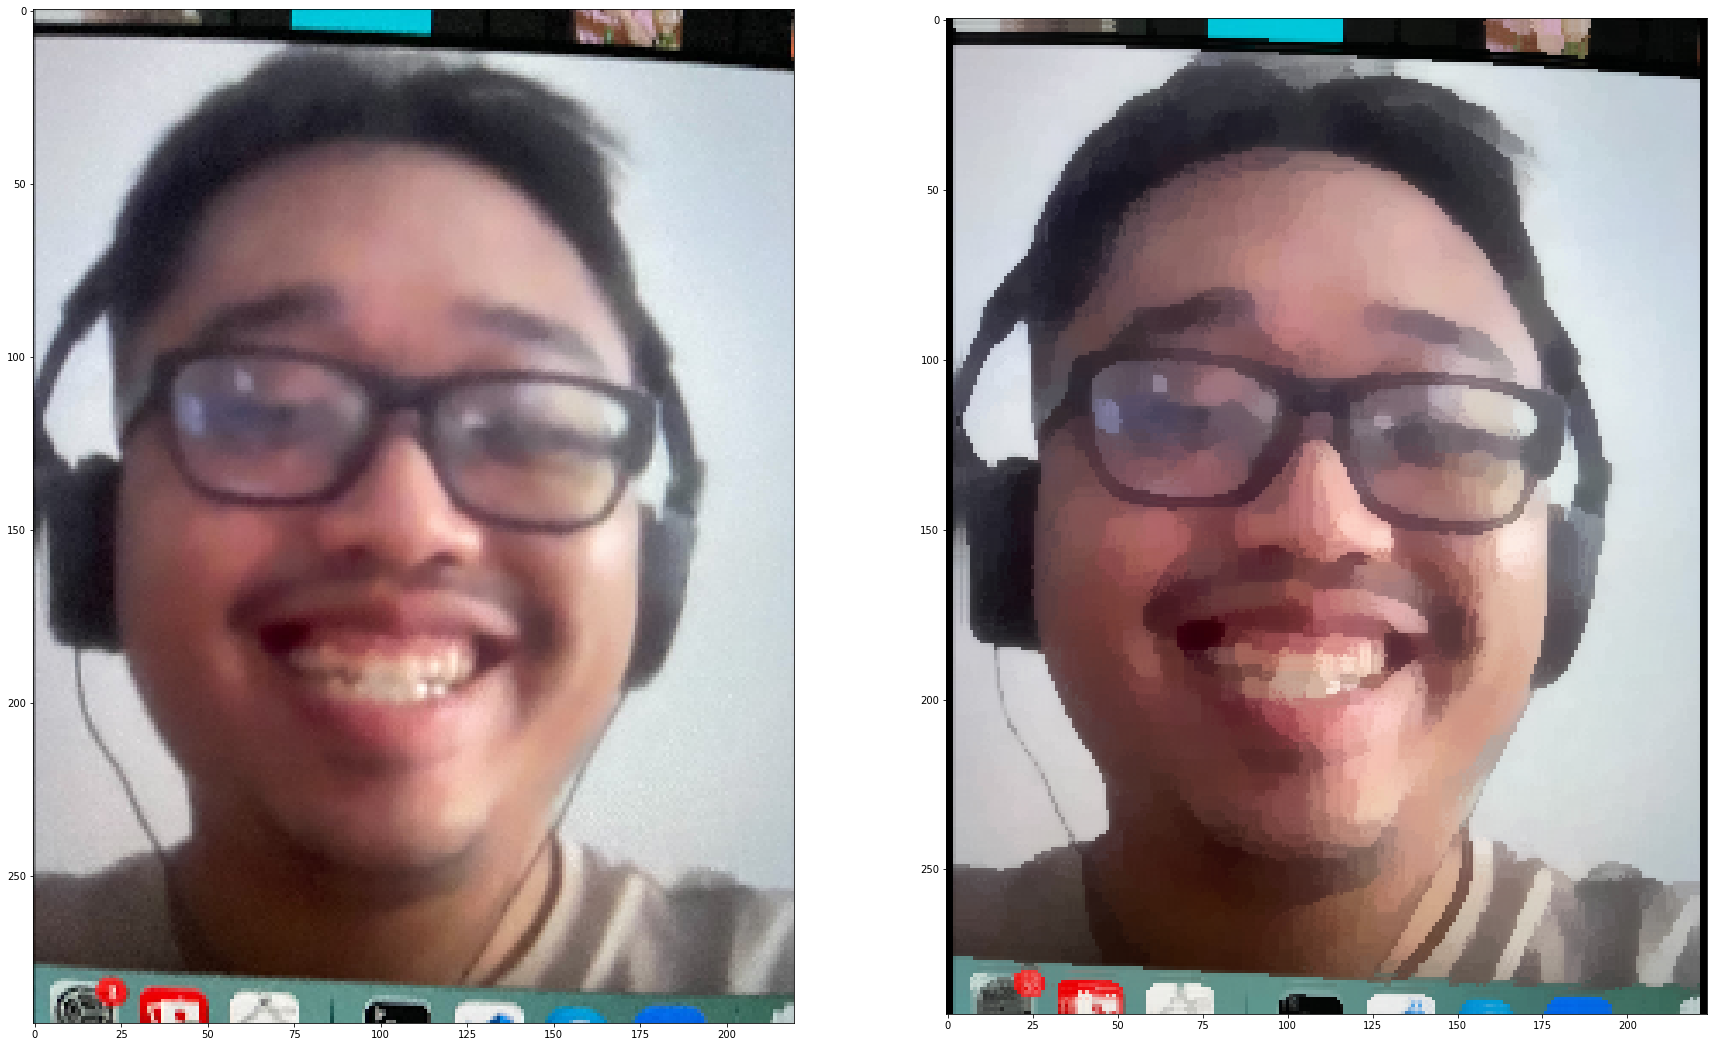

In [ ]:
%matplotlib inline
output = np.zeros(original.shape)
pad = int((size-1)/2)
output = np.dstack((r_[pad:-pad], g_[pad:-pad], b_[pad:-pad]))
# output = np.dstack((h[pad:-pad], s[pad:-pad], v[pad:-pad]))

# output[:,:,0], output[:,:,1], output[:,:,2] = r,g,b
fig = plt.figure(figsize=(30, 60))
# fig.figure(figsize=(10, 20)
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(output)
ax2 = fig.add_subplot(1,2,1)
ax2.imshow(original)

#GPU

In [ ]:
import numba
from numba import cuda
import cv2
import matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
@cuda.jit
def rgb_to_hsv(in_, out):
    x = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    y = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
    r, g, b = in_[x, y, 0], in_[x, y, 1], in_[x, y, 2]
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn

    if mx == mn:
        h = 0.0
    elif mx == r:
        h = 60*((g-b)/df % 6)
        
    elif mx == g:
        h = 60*((b-r)/df + 2)
        
    elif mx == b:
        h = 60*((r-g)/df + 4)
        
    if mx == 0.0:
        s = 0.0
    else:
        s = (df/mx)
    v = mx

    
    # out[x, y, 0] = h 
    # out[x, y, 1] = s
    # out[x, y, 2] = v
    out[0, x, y] = h 
    out[1, x, y] = s
    out[2, x, y] = v
    
@cuda.jit
def hsv_to_rgb(in_, dst):
    x = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    y = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
    h, s, v = in_[x, y, 0]/255.0, in_[x, y, 1]/255.0, in_[x, y, 2]/255.0
    
    d = h / 60
    hi = int(d % 6)
    f = d - hi
    l = v * (1 - s)
    m = v * (1 - f * s)
    n = v * (1 - (1 - f) * s)
    
    if 0.0 <= h < 60.0:
        r,g,b= v, n, l
    if 60.0 <= h < 120.0:
        r,g,b= m, v, l
    if 120.0 <= h < 180.0:
        r,g,b= l, v, n
    if 180.0 <= h < 240.0:
        r,g,b= l, m, v
    if 240.0 <= h < 300.0:
        r,g,b= n, l, v
    if 300.0 <= h < 360.0:
        r,g,b= v, l, m

In [ ]:

@cuda.jit
def Kuwahara_v(RGB, V_in, KuwaRGB, kernelSize):
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

    kernel_map = (
                ((tidx-kernelSize, tidx+1), (tidy-kernelSize, tidy+1)),
                ((tidx, tidx+kernelSize+1), (tidy-kernelSize, tidy+1)),
                ((tidx-kernelSize, tidx+1), (tidy, tidy+kernelSize+1)),
                ((tidx, tidx+kernelSize+1), (tidy, tidy+kernelSize+1))
                )
    min_std = 99999.0
    min_idx = 0
    for idx in range(4):
        # mean[i] = conv2d(image, kernelstack[i]) 	                 # mean 
        # std[i] = conv2d(image**2, kernelstack[i]) - mean[i]**2 		 # variance    
        
        # y, x = image.shape
        # y = y - height + 1
        # x = x - height + 1
        # new_image = np.zeros((y ,x))
        # print (new_image.shape)

        sum = 0.0
        sumSquare = 0.0

        for wi in range(*kernel_map[idx][0]):
          for wj in range(*kernel_map[idx][1]):
                sum += V_in[2,wi, wj]
                sumSquare += V_in[2, wi, wj] **2
        
        mean = sum/(kernelSize+1)**2
        std = math.sqrt(abs(sumSquare /(kernelSize+1)**2 - mean**2))
        if std < min_std:
            min_std = std
            min_idx = idx
    
    sum_r = 0.0
    sum_g = 0.0
    sum_b = 0.0
    for i in range(*kernel_map[min_idx][0]):
        for j in range(*kernel_map[min_idx][1]):
            sum_r += RGB[i, j, 0]
            sum_g += RGB[i, j, 1]
            sum_b += RGB[i, j, 2]
    # Average of RGB with V index
    KuwaRGB[tidx, tidy, 0] = sum_r / (kernelSize+1)**2
    KuwaRGB[tidx, tidy, 1] = sum_g / (kernelSize+1)**2
    KuwaRGB[tidx, tidy, 2] = sum_b / (kernelSize+1)**2


# Main GPU


GPU processing time:  0.0002143383026123047


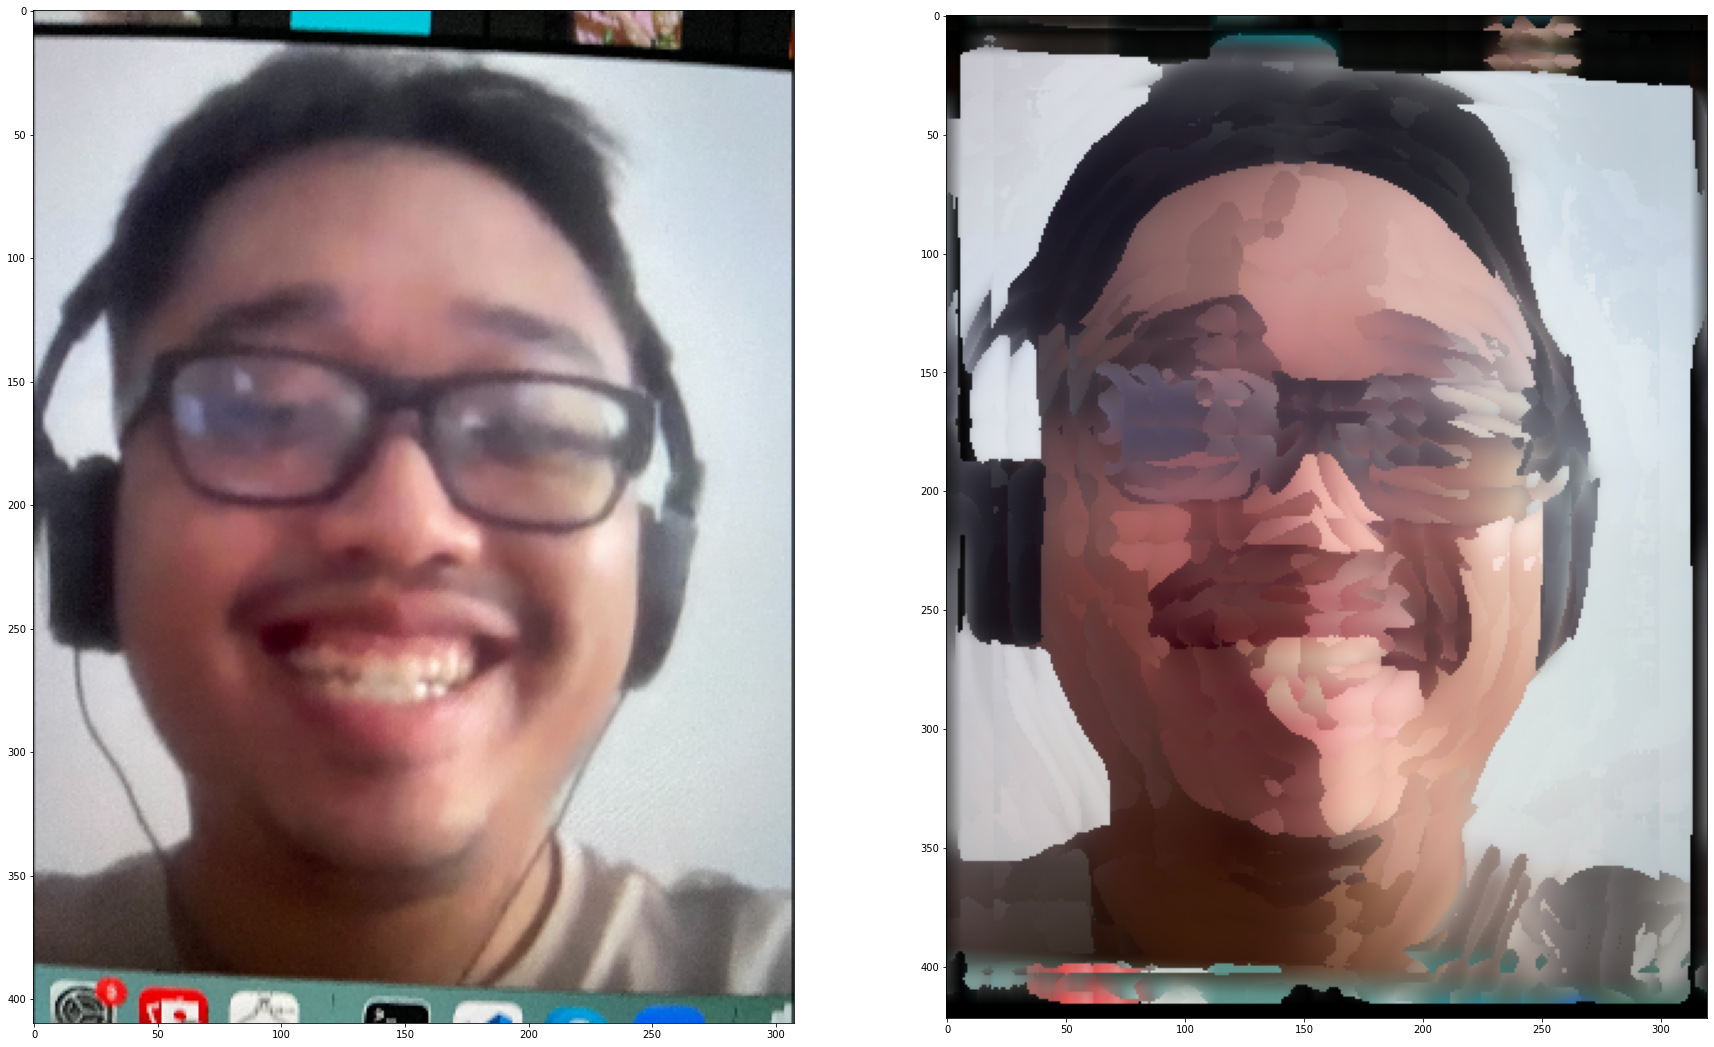

In [ ]:

import math

img = plt.imread('test.jpg')

img = img[::5, ::5]

size = int(13)
pad_size = size

pad_size = int((size -1)/2)
pad = np.zeros((img.shape[0] + size-1, img.shape[1] + size-1, 3))
pad[pad_size:-pad_size, pad_size:-pad_size] = img

h, w, _ = pad.shape

hsv = cuda.device_array((3, h, w), img.dtype)
rgb_out = cuda.device_array(pad.shape, img.dtype)

blockSize = (32, 32)
gridSize = (math.ceil((h)/blockSize[0]), math.ceil((w)/blockSize[1]))

rgb_in = cuda.to_device(pad)

rgb_to_hsv[gridSize, blockSize](rgb_in, hsv)


start = time.time()
Kuwahara_v[gridSize, blockSize](rgb_in, hsv, rgb_out, size)
print('GPU processing time: ', time.time()-start)

output = rgb_out.copy_to_host()
fig = plt.figure(figsize=(30, 60))
# fig.figure(figsize=(10, 20)
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(output)
ax2 = fig.add_subplot(1,2,1)
ax2.imshow(img)
